In [48]:
#The first method

In [49]:
#Using close' as the dataset and label in predicting stock prices with an LSTM (Long Short-Term Memory) network is a common and effective approach for 
#several reasons:1. Direct Relation to Stock Value
                #2. Time Series Nature
                #3. Simplicity and Effectiveness
                #4. Financial Significance

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [51]:
df=pd.read_csv('TSLA .csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [53]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [54]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index(['Date'],inplace=True)

In [55]:
df=df.drop(['Adj Close'],axis=1)
df.dropna(inplace=True)

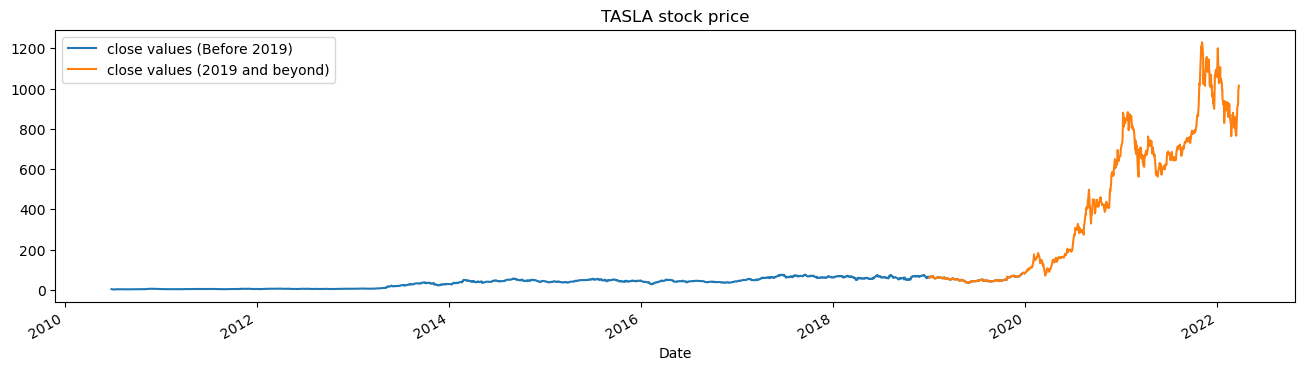

In [56]:
# Plot Close
df["Close"][:'2019'].plot(figsize=(16, 4), legend=True)
df["Close"]['2019':].plot(figsize=(16, 4), legend=True)
plt.legend(['close values (Before 2019)', 'close values (2019 and beyond)'])
plt.title('TASLA stock price')
plt.show()

In [57]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500
...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,33408500
2022-03-21,914.979980,942.849976,907.090027,921.159973,27327200
2022-03-22,930.000000,997.859985,921.750000,993.979980,35289500


In [58]:
dataset=df['Close'].values.reshape(-1, 1)
sc = MinMaxScaler(feature_range=(0, 1))
data = sc.fit_transform(dataset)

In [59]:
data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.80767879],
       [0.81186057],
       [0.82393312]])

In [60]:
def get_sequance(data,sequence_length):
    x=[]
    y=[]
    for i in range(sequence_length,data.shape[0]):
        x.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    X=np.array(x)
    Y=np.array(y)
    return X,Y


In [61]:
sequance_length = 30
X, Y = get_sequance(data, sequance_length)

In [62]:
X.shape


(2926, 30)

In [63]:
Y.shape

(2926,)

In [64]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train, y_test = train_test_split(X,Y , 
                                   random_state=104,  
                                   test_size=0.2,  
                                   shuffle=True) 

In [65]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [66]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequance_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\Yara\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(
    patience = 15,
    restore_best_weights = True,
    verbose = 1,
    min_delta = 0.001,
)
# Train the model
model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 30,batch_size = 64,verbose = 1,shuffle=True,callbacks = [early_stopping])

Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 113ms/step - loss: 0.0269 - val_loss: 6.5694e-04
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 5.4883e-04 - val_loss: 3.9500e-04
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 5.0773e-04 - val_loss: 3.6433e-04
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 4.2149e-04 - val_loss: 2.9402e-04
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 3.9772e-04 - val_loss: 3.3638e-04
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 3.7334e-04 - val_loss: 2.6452e-04
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 3.6716e-04 - val_loss: 2.5020e-04
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 4.4283e-04 - val_loss: 2.4119e-04
Epoch 9/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 4.0525e-04 - val_loss: 4.0102e-04
Epoch 10/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 3.9025e-04 - val_loss: 2.6980e-04
Epoch 11/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 3.4725e-04 

In [69]:
# Predicting
predictions = model.predict(X_test)
predictions = sc.inverse_transform(predictions)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step


In [70]:
ytrue=sc.inverse_transform(y_test.reshape(-1, 1))

In [71]:
from sklearn.metrics import r2_score
acc=r2_score(ytrue, predictions)
print(acc)

0.983412402792977


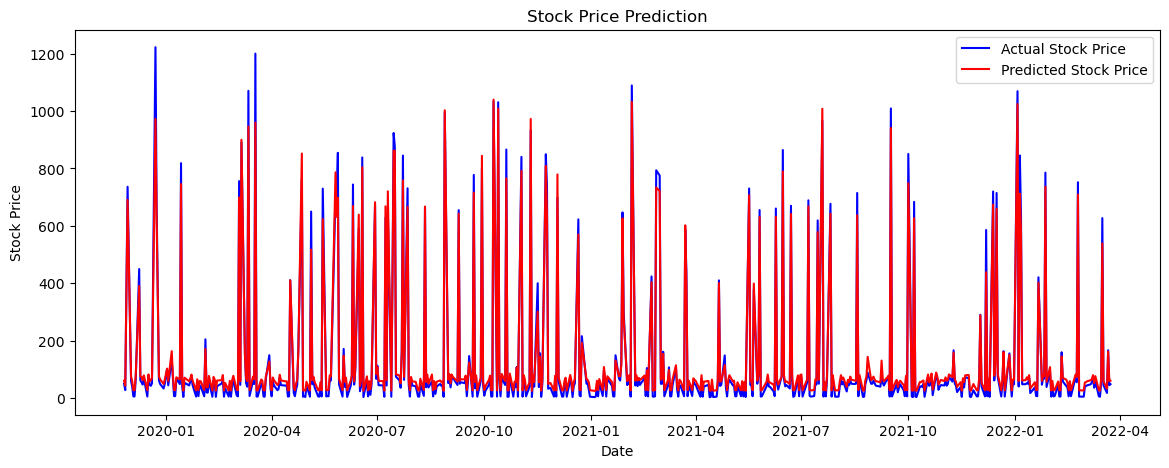

In [72]:
# Plot the results
split = int(0.8 * len(X))
plt.figure(figsize=(14, 5))
plt.plot(df.index[split + 30:], ytrue, color='blue', label='Actual Stock Price')
plt.plot(df.index[split + 30:], predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [73]:
#The second method

In [74]:
#Using Open	High Low Volume as the dataset and Close as label

In [77]:
df2=df
df2.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,34334500


In [78]:
label=df2['Close']
df2=df2.drop(['Close'],axis=1)
d=df2.iloc[:,:]

In [79]:
scaler = MinMaxScaler(feature_range=(0, 1))
d=scaler.fit_transform(d)

In [80]:
def create_sequance(sequence_length,data,label):
    X=[]
    for j in range(4):
        X.append([])
        for i in range(sequence_length,data.shape[0]):
            X[j].append(data[i-sequence_length:i, j])
    X=np.moveaxis(X,[0],[2])
    X=np.array(X)
    y=np.array(label[sequence_length:])
    Y=np.reshape(y,(len(y),1))
    return X,Y

In [81]:
x,y=create_sequance(30,d,label)

In [82]:
x.shape

(2926, 30, 4)

In [83]:
y.shape

(2926, 1)

In [84]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train, y_test = train_test_split(x,y , 
                                   random_state=104,  
                                   test_size=0.2,  
                                   shuffle=True) 

In [85]:
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaler2 = MinMaxScaler(feature_range=(0, 1))
ytrain = scaler1.fit_transform(y_train)
ytest = scaler2.fit_transform(y_test)

In [86]:
X_train.shape

(2340, 30, 4)

In [87]:
y_train.shape

(2340, 1)

In [88]:
model = Sequential()
model.add(LSTM(150,input_shape = (30,4),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))
model.compile(loss = 'mse',optimizer = 'adam')

C:\Users\Yara\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [89]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 150)            │        93,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,151 (363.87 KB)

 Trainable params: 93,151 (363.87 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(
    patience = 15,
    restore_best_weights = True,
    verbose = 1,
    min_delta = 0.001,
)

In [91]:
model.fit(X_train,ytrain,validation_data = (X_test,ytest),epochs = 30,batch_size = 64,verbose = 1,shuffle=True,callbacks = [early_stopping])


Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 0.0212 - val_loss: 4.5282e-04
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 7.3074e-04 - val_loss: 3.2630e-04
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 7.9417e-04 - val_loss: 2.4377e-04
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 6.7830e-04 - val_loss: 2.2261e-04
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 6.2996e-04 - val_loss: 2.1828e-04
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 8.0418e-04 - val_loss: 2.5490e-04
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 6.9666e-04 - val_loss: 2.1119e-04
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 4.5434e-04 - val_loss: 1.7917e-04
Epoch 9/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 4.9864e-04 - val_loss: 2.5050e-04
Epoch 10/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 5.4408e-04 - val_loss: 4.0571e-04
Epoch 11/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 7.1146e-04 - 

In [101]:
ypred=model.predict(X_test)

from sklearn.metrics import r2_score
acc=r2_score(ytest, ypred)
print(acc)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
0.9887183533157683


In [94]:
pred=scaler2.inverse_transform(ypred)

In [95]:
for i in range(len(y_test)):
    print(y_test[i],pred[i])


[51.094002] [59.90388]
[28.43] [39.68838]
[736.27002] [680.92975]
[60.167999] [64.16599]
[39.821999] [55.40815]
[6.164] [11.20482]
[6.41] [11.653173]
[63.792] [75.5365]
[449.76001] [390.04395]
[62.07] [65.15922]
[55.248001] [79.66969]
[47.619999] [55.10725]
[69.688004] [68.87104]
[6.08] [12.102777]
[75.961998] [72.78643]
[46.467999] [43.73082]
[43.127998] [52.818676]
[52.084] [63.904408]
[1222.089966] [1053.6172]
[670.969971] [618.48975]
[62.043999] [63.669605]
[49.686001] [52.376633]
[33.924] [47.06665]
[49.798] [48.94263]
[102.099998] [119.59585]
[44.964001] [45.677914]
[133.598007] [169.431]
[67.905998] [69.45155]
[7.218] [11.879385]
[7.588] [12.617116]
[68.554001] [74.03353]
[49.234001] [50.85296]
[818.320007] [740.58044]
[40.838001] [53.972576]
[4.636] [12.371555]
[53.897999] [68.19269]
[44.452] [49.725494]
[59.740002] [64.85451]
[70.919998] [73.19329]
[45.080002] [56.21524]
[5.698] [13.565085]
[47.976002] [52.86518]
[7.398] [13.045514]
[45.784] [47.124016]
[40.849998] [46.653736]

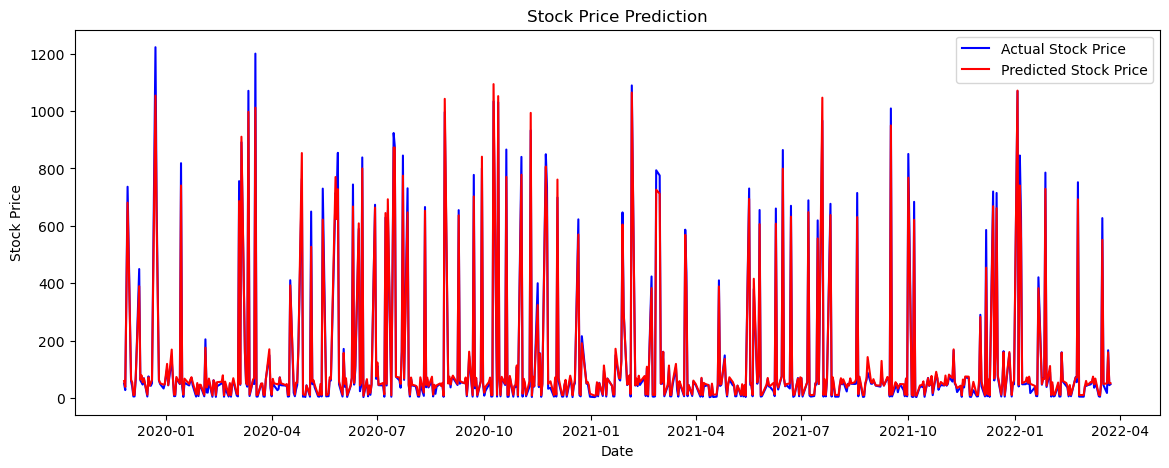

In [99]:
# Plot the results
split = int(0.8 * len(x))
plt.figure(figsize=(14, 5))
plt.plot(df.index[split + 30:], y_test, color='blue', label='Actual Stock Price')
plt.plot(df.index[split + 30:], pred, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()